**SEABORN**

* Library di python yang khusus untuk membuat plot statistik
* Dibuat berdasarkan library matplotlib
* Sangat cocok dipakai bersama library pandas

In [1]:
import pandas as pd

In [3]:
dataku = pd.read_csv('kapal_titanic.csv')
dataku

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [4]:
dataku.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [5]:
import seaborn as sns

In [6]:
sns.set() #ini harus ada, karena memberitahu kepada python kita ingin menggunakan seaborn

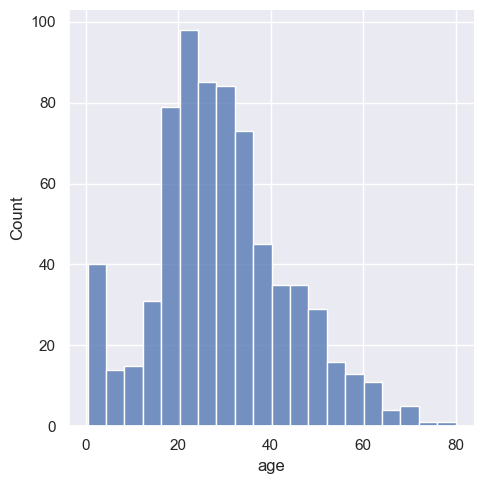

In [8]:
# Distribution plot
# Kurva di seaborn disebut juga Kernel Density Estimation (KDE)

sns.displot(dataku.age);

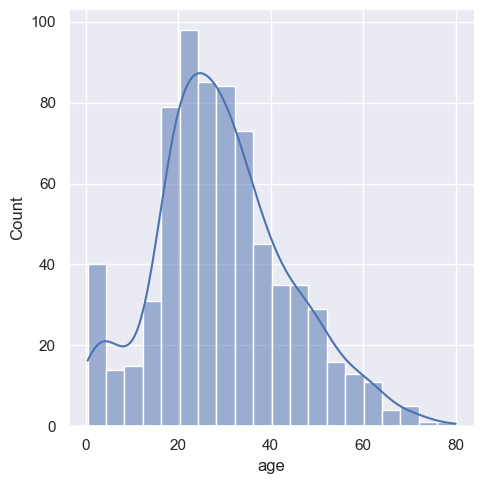

In [9]:
sns.displot(dataku.age, kde=True);

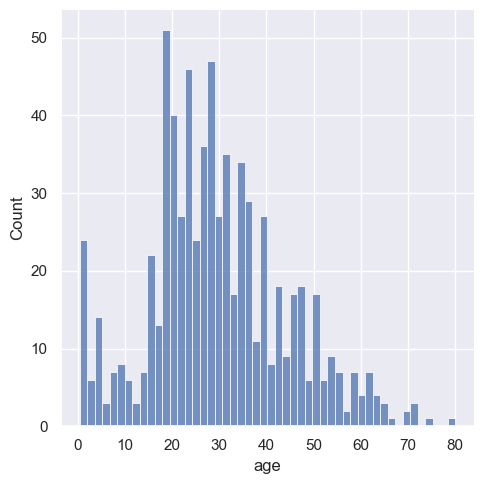

In [10]:
sns.displot(dataku.age, kde=False, bins=50); # bins membuat batang menjadi banyak dan terlihat ramping

In [11]:
dataku.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


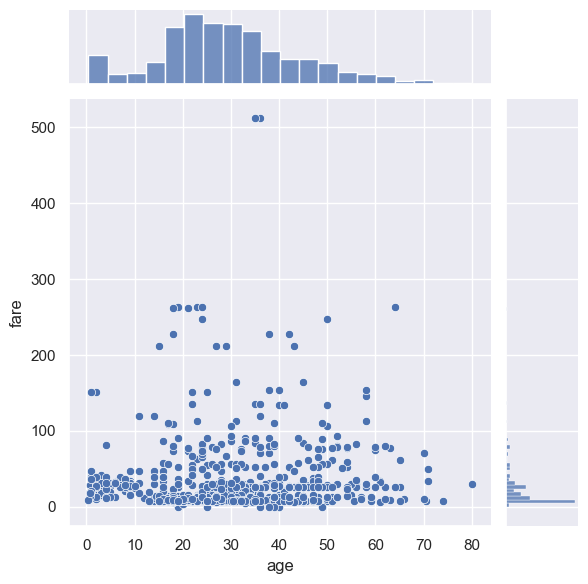

In [23]:
# membuat grafik age dan fare

sns.jointplot(x='age', y='fare', data=dataku);

In [21]:
import scipy.stats as stat # memunculkan data statistik di dalam grafik

In [25]:
sns.jointplot('age', 'fare', stat_func=stat.pearsonr, data=dataku);

TypeError: jointplot() got multiple values for argument 'data'

In [26]:
# menghilangkan warning ketika muncul saat eksekusi

from warnings import filterwarnings
filterwarnings ('ignore')

In [27]:
sns.jointplot('age', 'fare', stat_func=stat.pearsonr, kind='reg', data=dataku);

TypeError: jointplot() got multiple values for argument 'data'

In [28]:
# menghilangkan outlier
# versi1 manual

dataku.fare[dataku.fare>400]

258    512.3292
679    512.3292
737    512.3292
Name: fare, dtype: float64

In [29]:
dataku2 = dataku.drop([258, 679, 737]) # drop menghilangkan baris

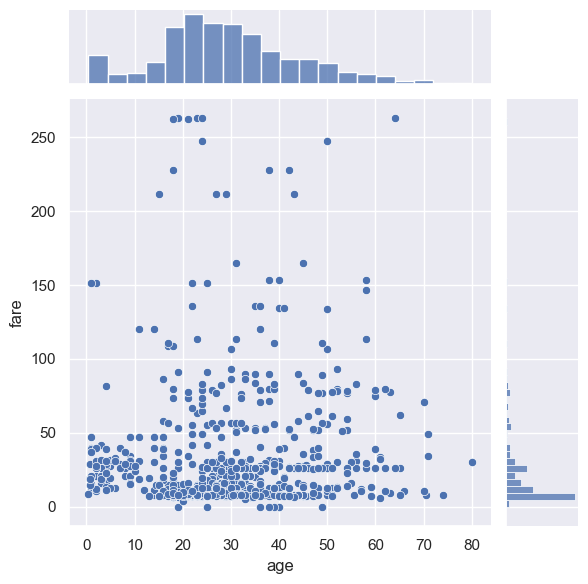

In [30]:
sns.jointplot(x='age', y='fare', data=dataku2);

In [32]:
# versi2 distribusi Z (normal)
from scipy.stats import zscore
import numpy as np

In [33]:
nilai_z = zscore(dataku.fare)

In [34]:
nilai_z

0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: fare, Length: 891, dtype: float64

In [36]:
# kita mencari absolutnya (absolut maksudnya nilai minus akan menjadi plus)

nilai_z_abs = np.abs(nilai_z)
nilai_z_abs

0      0.502445
1      0.786845
2      0.488854
3      0.420730
4      0.486337
         ...   
886    0.386671
887    0.044381
888    0.176263
889    0.044381
890    0.492378
Name: fare, Length: 891, dtype: float64

In [37]:
filter_data = (nilai_z_abs<3)

In [38]:
dataku2 = dataku[filter_data]

In [39]:
dataku2 #maka dari 890 rows hanya tersisa 871 raws karena banyak yang hilang

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


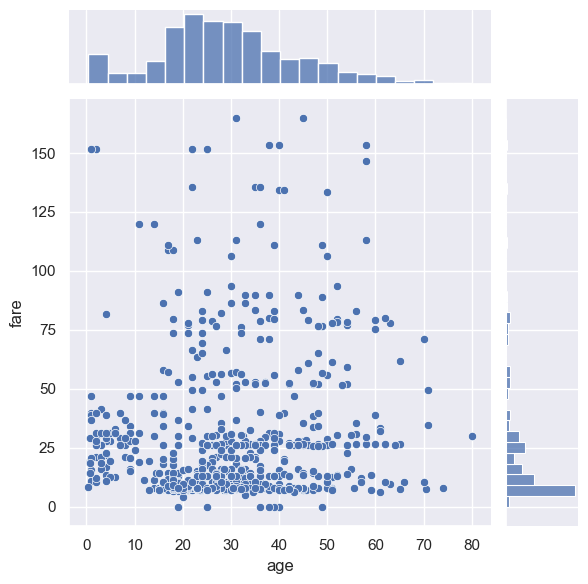

In [40]:
sns.jointplot(x='age', y='fare', data=dataku2);

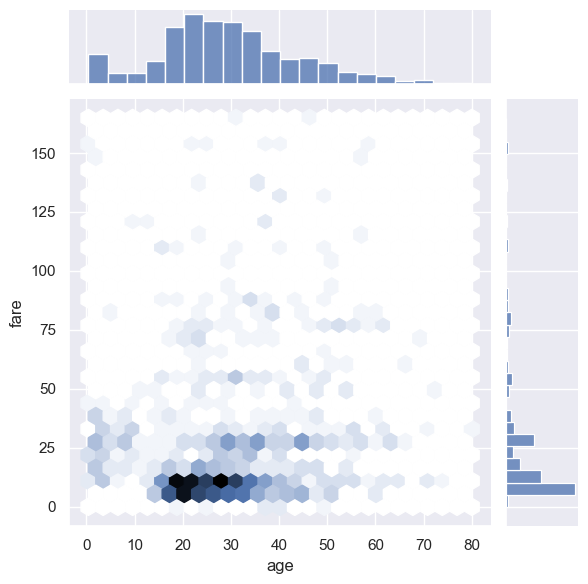

In [41]:
sns.jointplot(x='age', y='fare', kind='hex', data=dataku2);

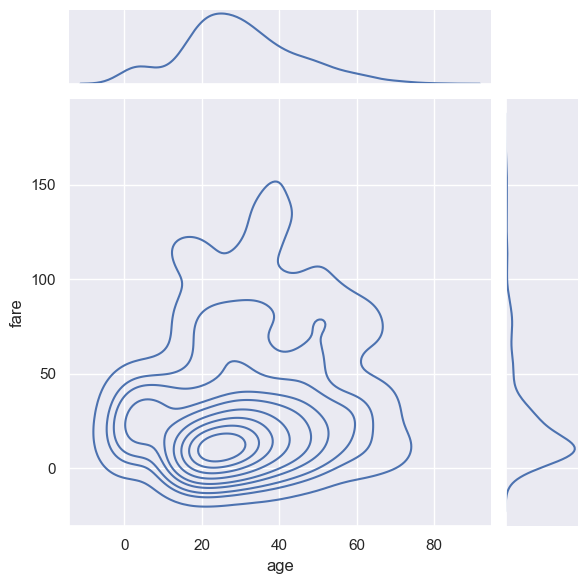

In [42]:
sns.jointplot(x='age', y='fare', kind='kde', data=dataku2);

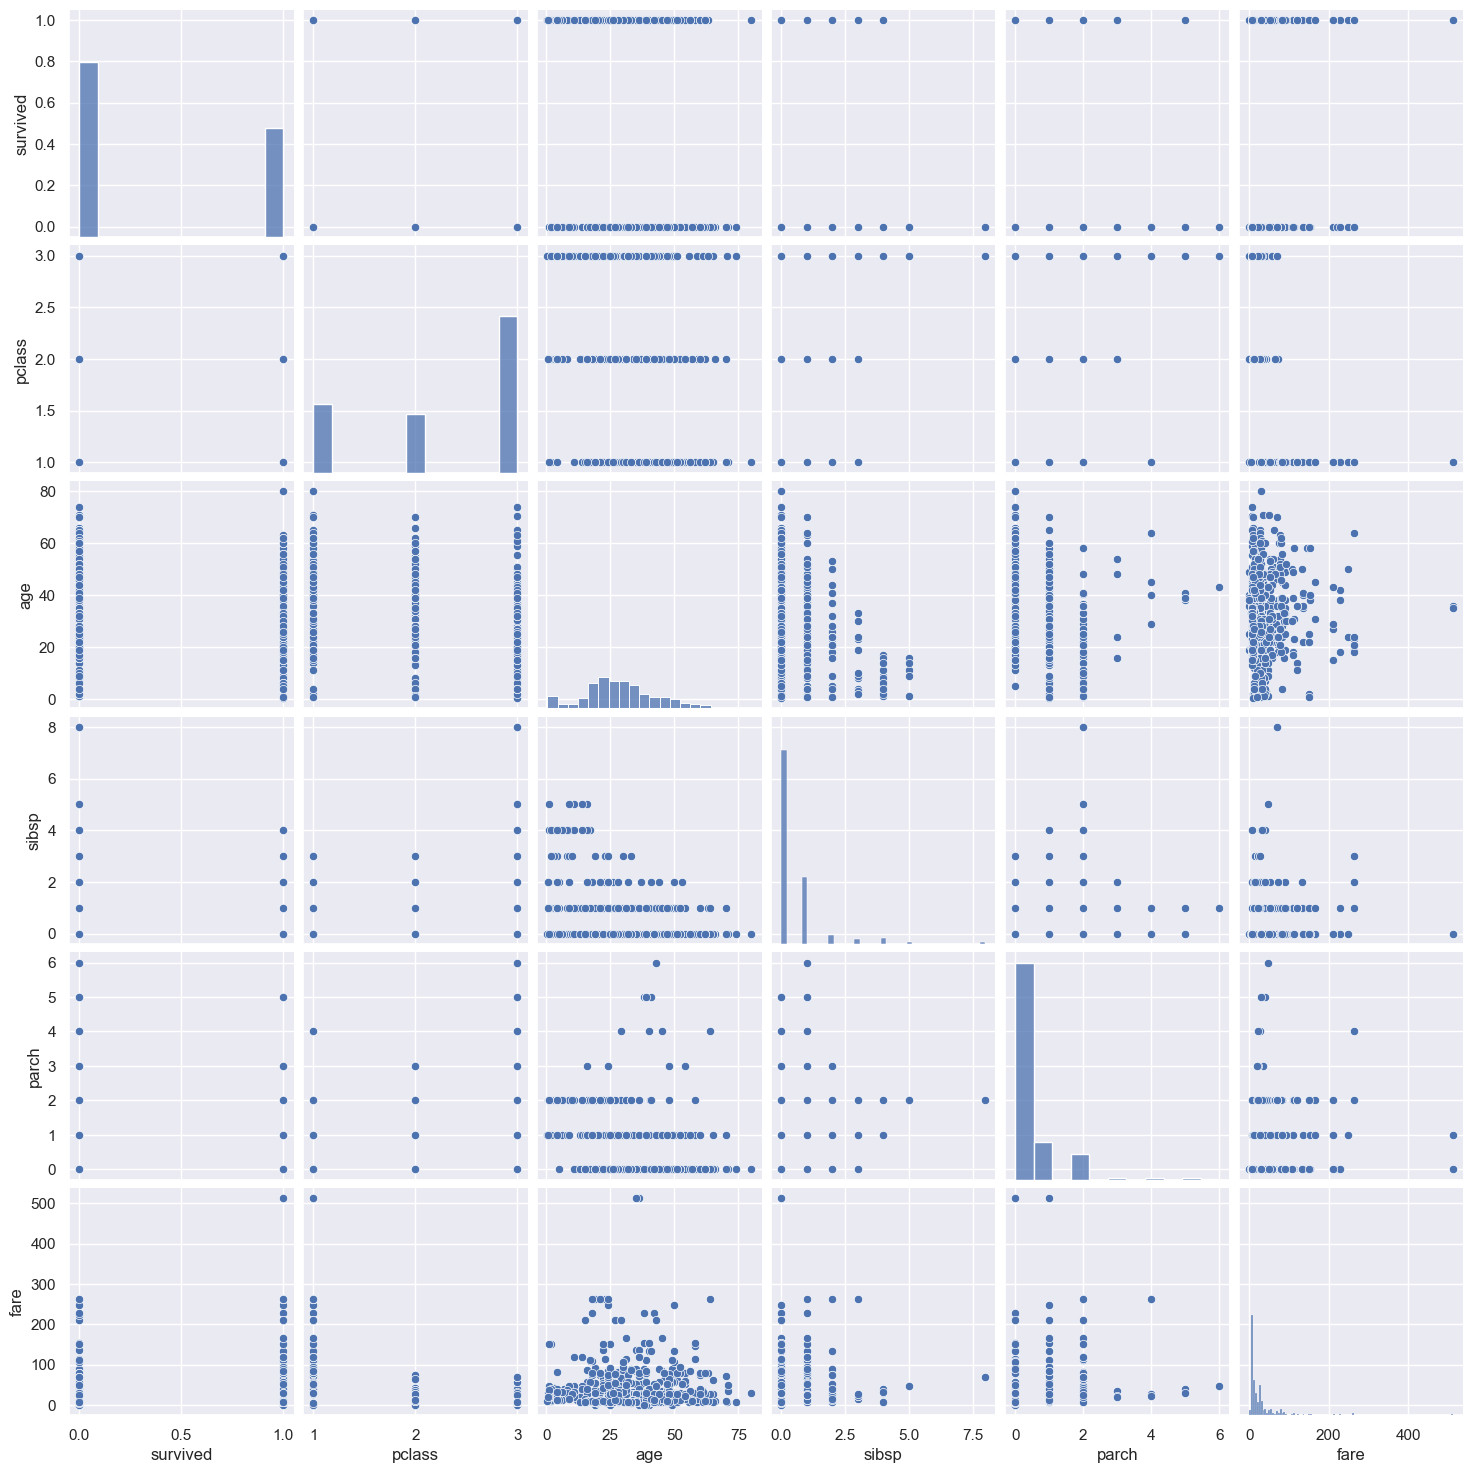

In [43]:
sns.pairplot(dataku); #pairplot adalah ringkasan global data numerik

In [44]:
dataku.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


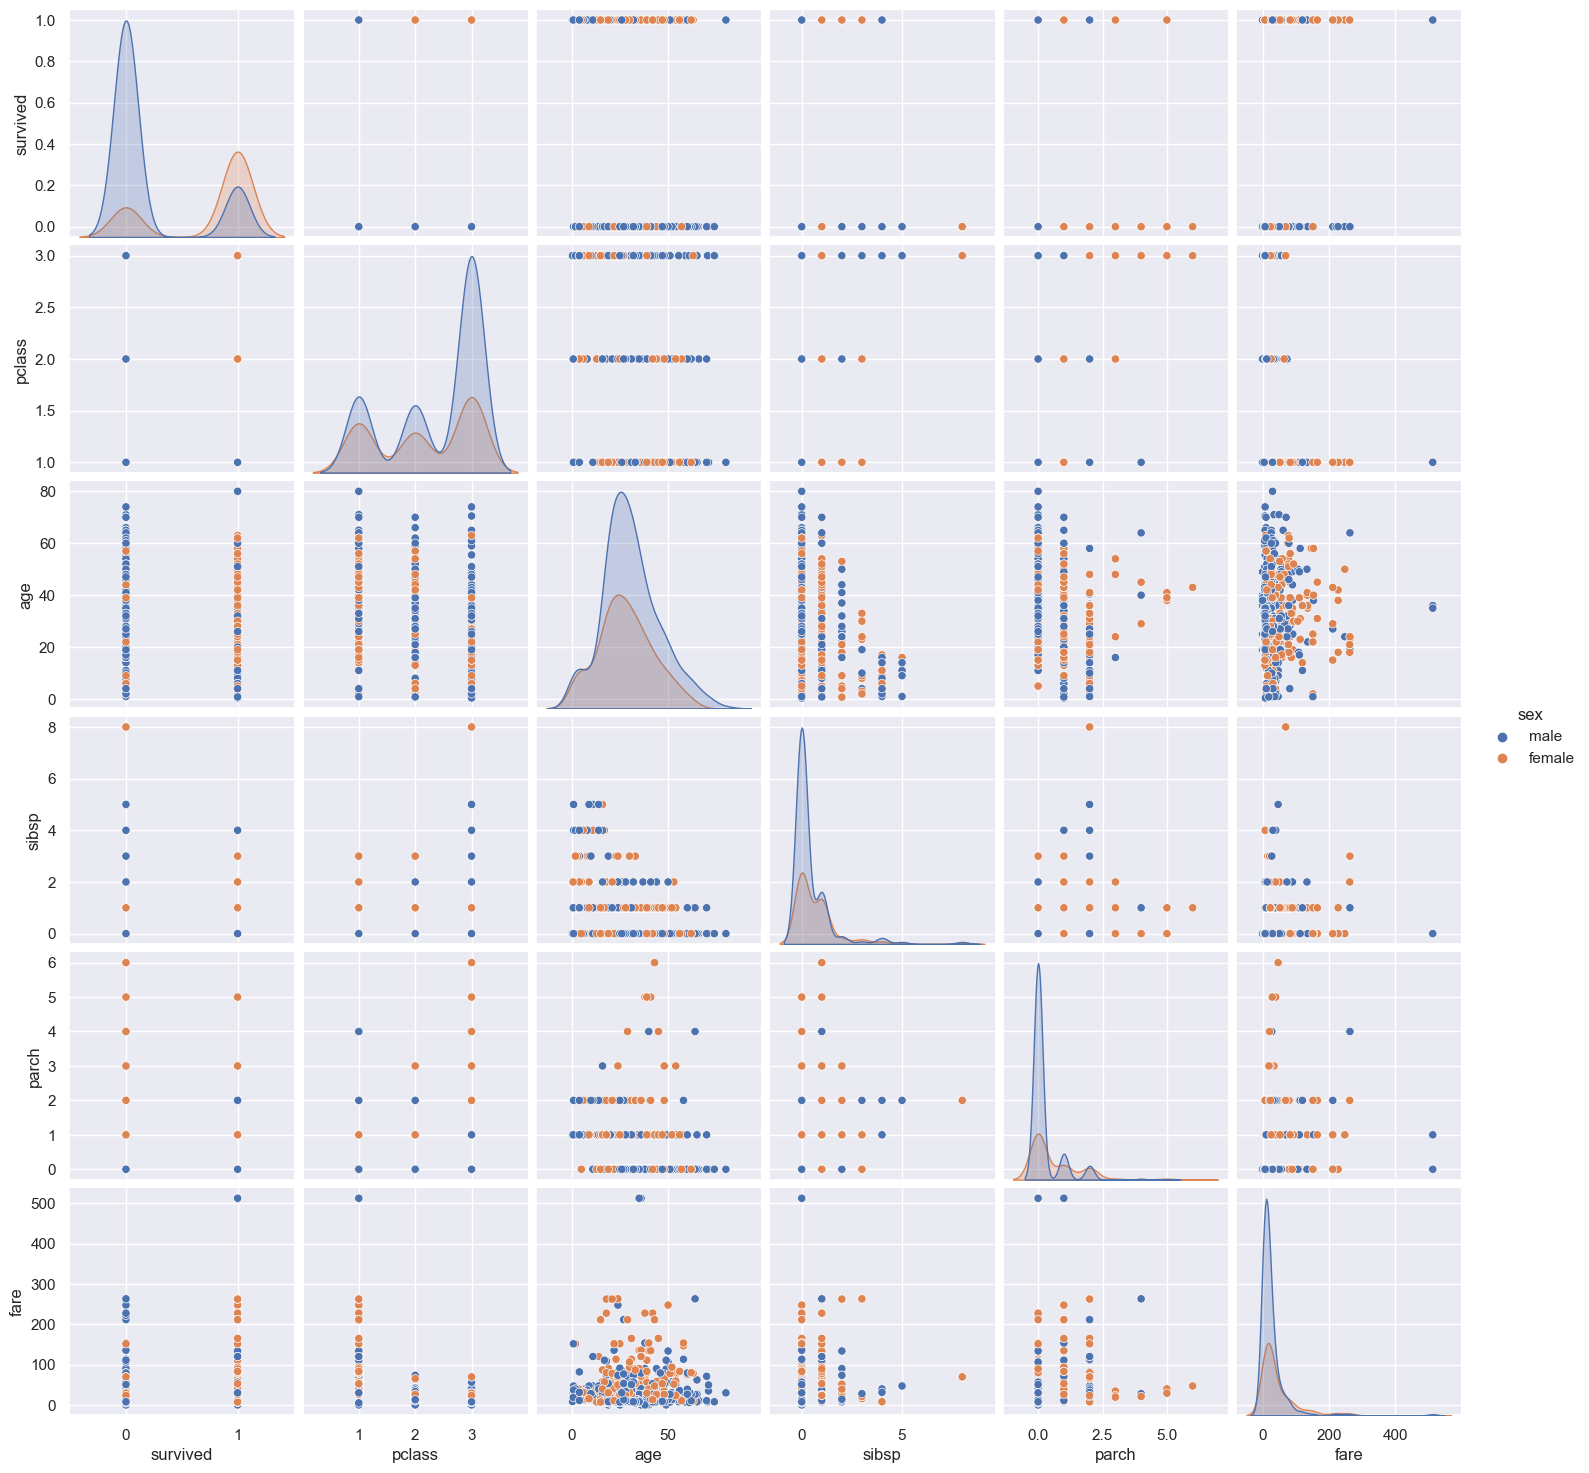

In [45]:
sns.pairplot(dataku, hue='sex'); # hue digunakan untuk string